### Zadanie 1

In [1]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.keys())
print(boston.data.shape)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radi

C:\Users\adamz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [2]:
import numpy as np
import pandas as pd

bos = pd.DataFrame(boston.data)
X = boston.data
y = boston.target

bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,shuffle=True, random_state=5)
print(X.shape[0])
print(float(X_train.shape[0]) / float(X.shape[0]))
print(float(X_test.shape[0]) / float(X.shape[0]))

506
0.7984189723320159
0.2015810276679842


In [4]:
#2
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)    
y_pred = regr.predict(X_test)
y_train_pred = regr.predict(X_train)

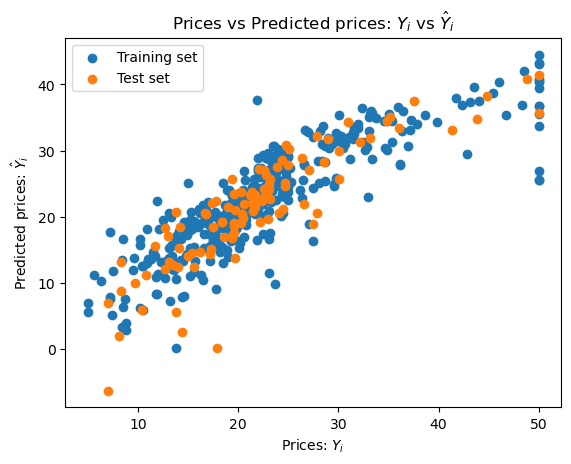

In [5]:
import matplotlib.pyplot as plt

plt.scatter(y_train, y_train_pred, label='Training set')
plt.scatter(y_test, y_pred, label='Test set')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.show()

Pytania
1. Wykres idealnie dopasowanych danych powinien być linią prostą y = x.
2. W przypadku overfittingu dane układają się w kształt funkcji wielomianowej.

In [6]:
#3
from sklearn.metrics import mean_squared_error
print(f'Mean Squared Error = {mean_squared_error(y_test, y_pred)}')

Mean Squared Error = 20.86929218377084


In [7]:
#4
print(f'Score = {regr.score(X_test, y_test)}')

Score = 0.7334492147453072


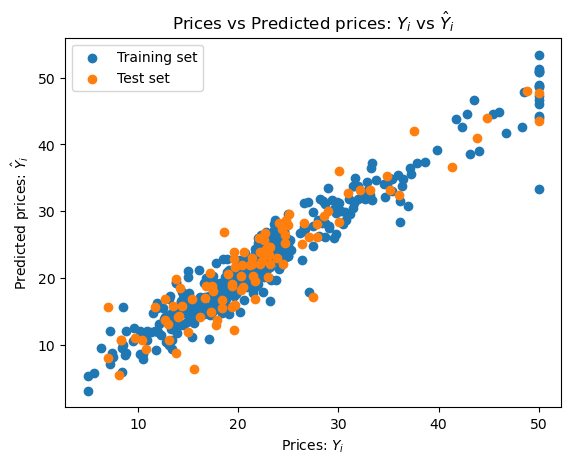

Mean Squared Error = 10.495881280712052
Score = 0.8659424875229133


In [8]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=2)

X_train2 = polynomial_features.fit_transform(X_train)
X_test2 = polynomial_features.fit_transform(X_test)
regr2 = LinearRegression()
regr2.fit(X_train2, y_train)    
y_pred2 = regr2.predict(X_test2)
y_train_pred2 = regr2.predict(X_train2)

plt.scatter(y_train, y_train_pred2, label='Training set')
plt.scatter(y_test, y_pred2, label='Test set')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.legend()
plt.show()

print(f'Mean Squared Error = {mean_squared_error(y_test, y_pred2)}')
print(f'Score = {regr2.score(X_test2, y_test)}')

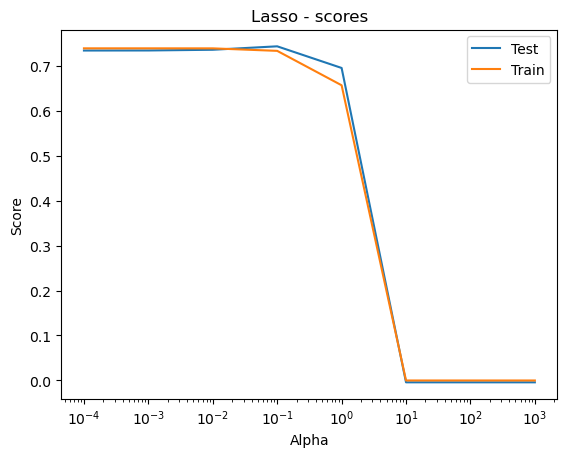

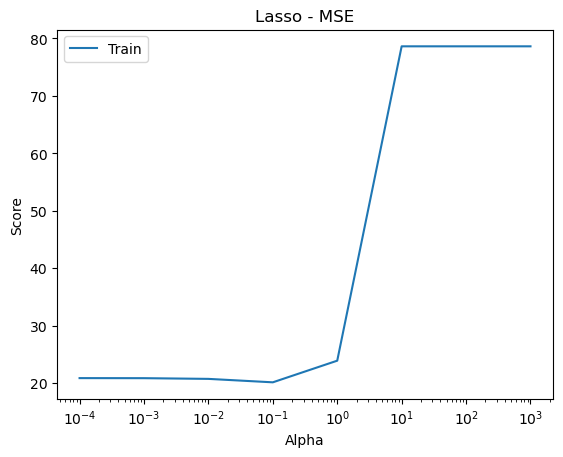

In [9]:
#5
from sklearn.linear_model import Ridge, Lasso

alphas = [10**i for i in range(-4, 4, 1)]
lasso_scores_test = []
lasso_scores_train = []
lasso_MSE = []

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    y_pred = lasso_reg.predict(X_test)
    lasso_scores_test.append(lasso_reg.score(X_test, y_test))
    lasso_scores_train.append(lasso_reg.score(X_train, y_train))
    lasso_MSE.append(mean_squared_error(y_test, y_pred))
    
plt.semilogx(alphas, lasso_scores_test, label='Test')
plt.semilogx(alphas, lasso_scores_train, label='Train')
plt.title('Lasso - scores')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.semilogx(alphas, lasso_MSE, label='Train')
plt.title('Lasso - MSE')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()

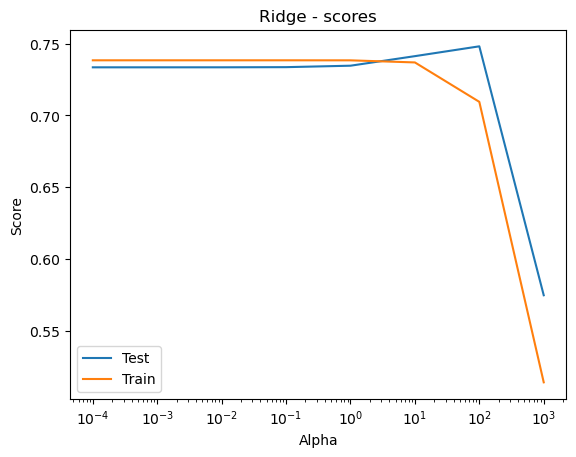

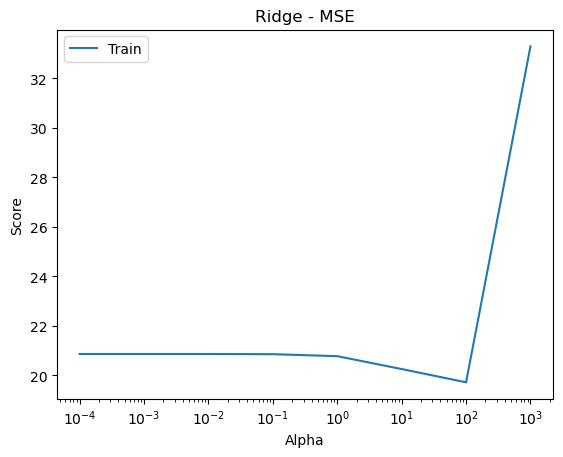

In [10]:
#6
alphas = [10**i for i in range(-4, 4, 1)]
ridge_scores_test = []
ridge_sroces_train = []
ridge_MSE = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)
    ridge_scores_test.append(ridge_reg.score(X_test, y_test))
    ridge_sroces_train.append(ridge_reg.score(X_train, y_train))
    ridge_MSE.append(mean_squared_error(y_test, y_pred))
    
plt.semilogx(alphas, ridge_scores_test, label='Test')
plt.semilogx(alphas, ridge_sroces_train, label='Train')
plt.title('Ridge - scores')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()

plt.semilogx(alphas, ridge_MSE, label='Train')
plt.title('Ridge - MSE')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend()
plt.show()

### Zadanie 2

In [11]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
 
y = data.target
X = data.data

In [12]:
#1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8,shuffle=True, random_state=5)

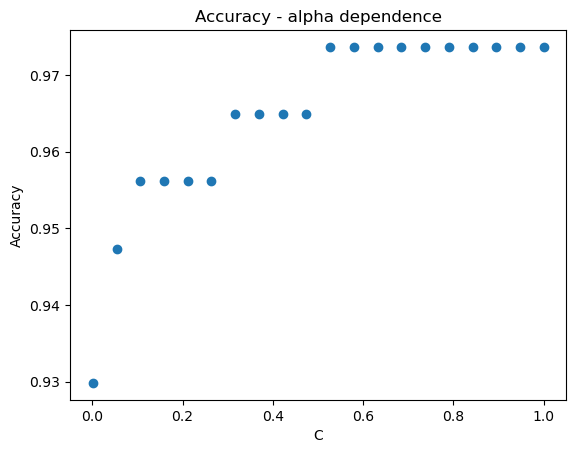

In [13]:
#2 i 3
from sklearn.linear_model import LogisticRegression
list_of_c = np.linspace(0.001, 1.0, num=20)
accuracy_list = []
for c in list_of_c:
    reg = LogisticRegression(penalty='l2', C=c, solver='liblinear', max_iter=200).fit(X_train, y_train)
    accuracy_list.append(reg.score(X_test, y_test))
    
plt.scatter(list_of_c, accuracy_list)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy - alpha dependence')
plt.show()